<a href="https://colab.research.google.com/github/nabxxmift23/submission/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Nabila Miftakhurriza
- **Email:** M208D4KX2477@bangkit.academy
- **ID Dicoding:** M208D4KX2477

## Menentukan Pertanyaan Bisnis

- Bagaimana tren bulanan jumlah rental sepeda?
- Bagaimana korelasi antara jumlah rental sepeda dengan temperatur, kelembapan, dan kecepatan angin?

## Import Semua Packages/Library yang Digunakan

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [28]:
url = 'https://raw.githubusercontent.com/nabxxmift23/submission/main/data/data%20bike_dicoding.csv'
df = pd.read_csv(url, sep=';')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01/01/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,02/01/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,03/01/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,04/01/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,05/01/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

In [29]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Berdasarkan output di atas, dapat dilihat bahwa tidak terdapat nilai kosong pada data.

In [30]:
df.duplicated().sum()

0

Output di atas menunjukkan bahwa tidak terdapat nilai duplikasi dalam data.

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Output di atas memperlihatkan tipe data semua variabel yang ada pada dataset.

## Cleaning Data

Sebelum melakukan analisis, diperlukan pengubahan tipe data pada kolom 'dteday' dari object menjadi tipe data date.

In [19]:
df['dteday'] = pd.to_datetime(df['dteday'])

<ipython-input-19-9e17016a417c>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['dteday'] = pd.to_datetime(df['dteday'])


Selanjutnya, akan dibuat dua kolom baru, yaitu 'month' dan 'year' untuk mempermudah analisis.

In [20]:
df['month'] = df['dteday'].dt.month
df['year'] = df['dteday'].dt.year

## Exploratory Data Analysis (EDA)

---



### Parameter Statistik Data

In [10]:
df.describe(include = 'all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,01/01/2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


Output di atas menunjukkan parameter statistik dari semua variabel yang terdapat pada data.

### Histogram Data

array([[<Axes: title={'center': 'instant'}>,
        <Axes: title={'center': 'season'}>,
        <Axes: title={'center': 'yr'}>, <Axes: title={'center': 'mnth'}>],
       [<Axes: title={'center': 'holiday'}>,
        <Axes: title={'center': 'weekday'}>,
        <Axes: title={'center': 'workingday'}>,
        <Axes: title={'center': 'weathersit'}>],
       [<Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'hum'}>,
        <Axes: title={'center': 'windspeed'}>],
       [<Axes: title={'center': 'casual'}>,
        <Axes: title={'center': 'registered'}>,
        <Axes: title={'center': 'cnt'}>, <Axes: >]], dtype=object)

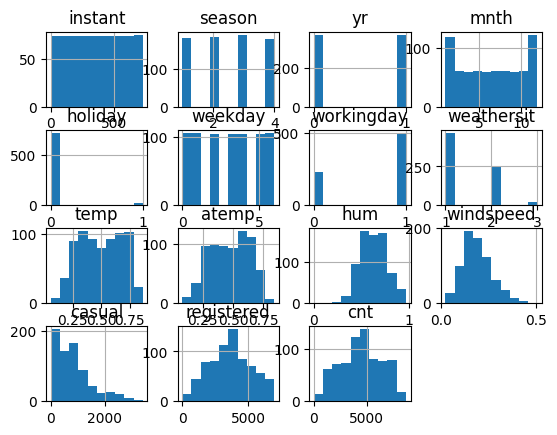

In [11]:
df.hist()

Output di atas menunjukkan histogram dari semua variabel dalam data.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren bulanan jumlah rental sepeda?

Hal pertama yang dilakukan sebelum memecahkan pertanyaan pertama adalah melakukan grouping sum dari kolom cnt berdasarkan kolom year dan month.

In [ ]:
cnt_bulanan = df.groupby(['year', 'month'])['cnt'].sum().reset_index()

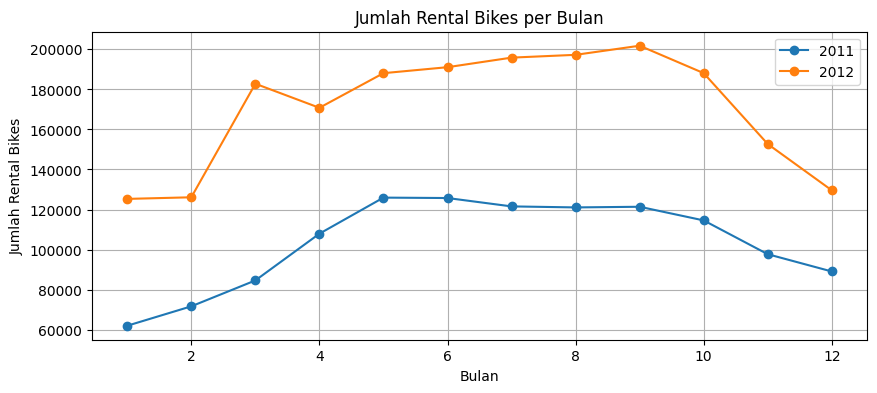

In [21]:
plt.figure(figsize=(10, 4))
for year in cnt_bulanan['year'].unique():
    plt.plot(cnt_bulanan[cnt_bulanan['year'] == year]['month'], cnt_bulanan[cnt_bulanan['year'] == year]['cnt'],
             marker='o', linestyle='-', label=str(year))

plt.title('Jumlah Rental Bikes per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Rental Bikes')
plt.grid(True)
plt.legend()
plt.show()

### Pertanyaan 2: Bagaimana korelasi antara jumlah rental sepeda dengan temperatur, kelembapan, dan kecepatan angin?

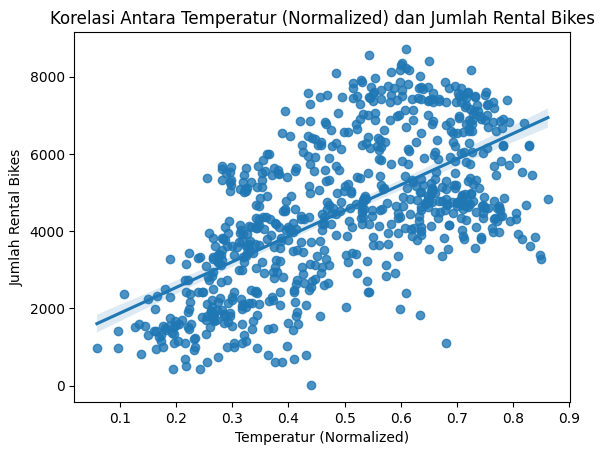

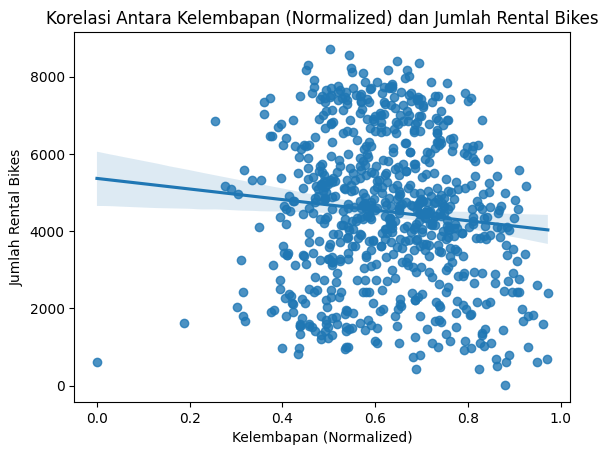

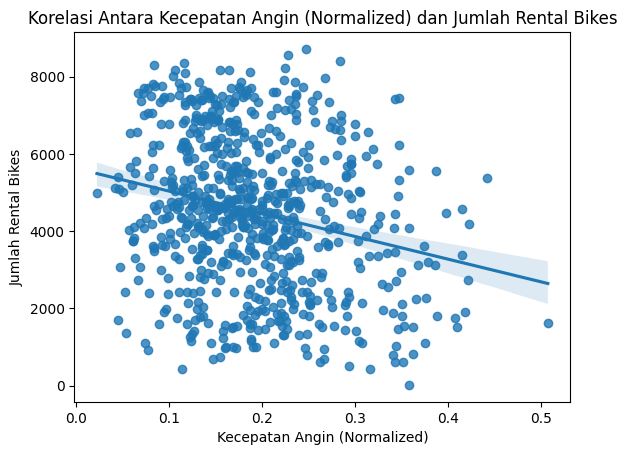

In [23]:
sns.regplot(x=df.temp, y=df.cnt)
plt.title('Korelasi Antara Temperatur (Normalized) dan Jumlah Rental Bikes')
plt.xlabel('Temperatur (Normalized)')
plt.ylabel('Jumlah Rental Bikes')
plt.show()

sns.regplot(x=df.hum, y=df.cnt)
plt.title('Korelasi Antara Kelembapan (Normalized) dan Jumlah Rental Bikes')
plt.xlabel('Kelembapan (Normalized)')
plt.ylabel('Jumlah Rental Bikes')
plt.show()

sns.regplot(x=df.windspeed, y=df.cnt)
plt.title('Korelasi Antara Kecepatan Angin (Normalized) dan Jumlah Rental Bikes')
plt.xlabel('Kecepatan Angin (Normalized)')
plt.ylabel('Jumlah Rental Bikes')
plt.show()

## Conclusion

### Pertanyaan 1
Jumlah peminjaman sepeda cenderung naik pada rentang bulan Maret sampai dengan bulan September. Oleh karena itu, pemegang usaha yang melakukan bisnis rental sepeda disarankan untuk melakukan rental sepeda pada rentang waktu tersebut.

### Pertanyaan 2
Temperatur dengan jumlah rental sepeda memiliki korelasi positif. Jika temperatur semakin tinggi, maka jumlah rental sepeda juga semakin banyak. Oleh karena itu, pemegang usaha bisa memperhatikan temperatur harian untuk menentukan waktu melakukan rental sepeda yang lebih baik, yaitu pada saat temperatur tinggi. Sementara itu, kelembapan dan kecepatan angin memiliki korelasi negatif dengan jumlah rental sepeda. Semakin tinggi kelembapan dan kecepatan angin, maka semakin sedikit jumlah rental sepeda. Oleh karena itu, pemegang usaha bisa memperhatikan kelembapan dan kecepatan angin harian untuk menentukan waktu melakukan rental sepeda yang lebih baik, yaitu pada saat kelembapan dan kecepatan angin harian rendah.